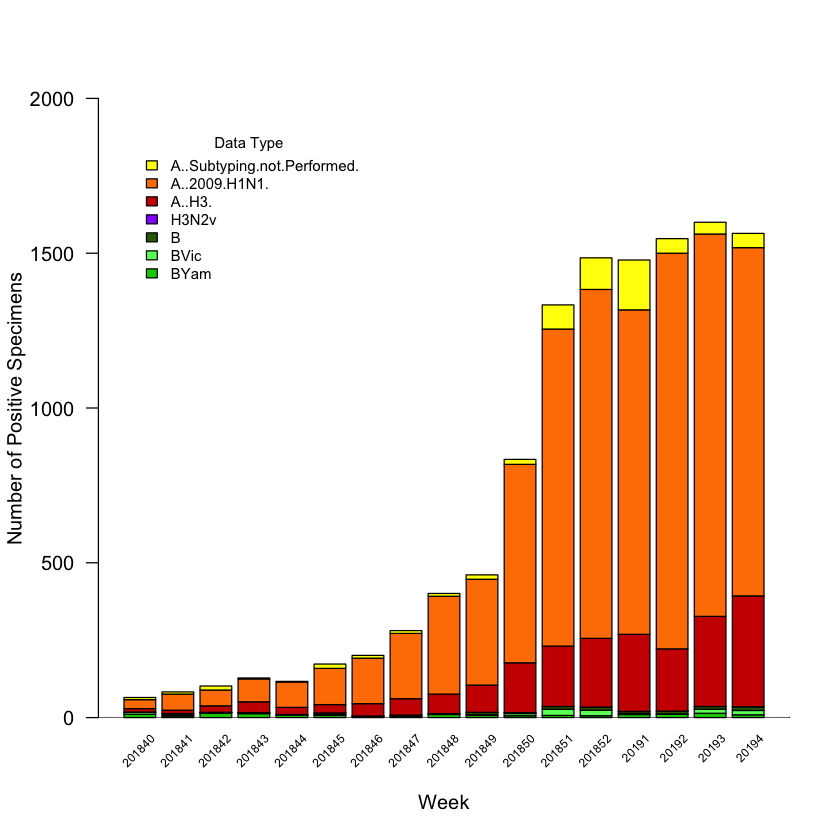

In [249]:
ptests<-read.csv("WHO_NREVSS_Public_Health_Labs.csv", skip = 1)
ptestsR <- ptests[1:17, c(1,2,3,4,5,11,10,9,12,7,6,8)]
year <- ptestsR[,3]
weeks <- ptestsR[,4]
weekLabel <- paste0(year, weeks)
colors <- c("#00CC00", "#66FF66", "#336600", "#9933FF", "#CC0000", "#FF8000", "#FFFF00")

plt <- barplot(as.matrix(as.data.frame(t(ptestsR[,6:12]))),beside=F,xlab="Week", ylab="Number of Positive Specimens", las=2, xaxt="n",ylim=c(0,2000),col=colors,axis.lty="solid")
legend("topleft",inset=c(0.05,0.05),rownames(t(ptestsR[12:6])),fill=rev(colors),title="Data Type", cex = 0.75, box.lty=0)
axis(1, at=weekLabel, labels = weekLabel, pos=1)
text(plt, par("usr")[3], srt = 45, labels= weekLabel,adj = c(1.1,3.1), xpd = TRUE, cex=0.6)
abline(h=0)

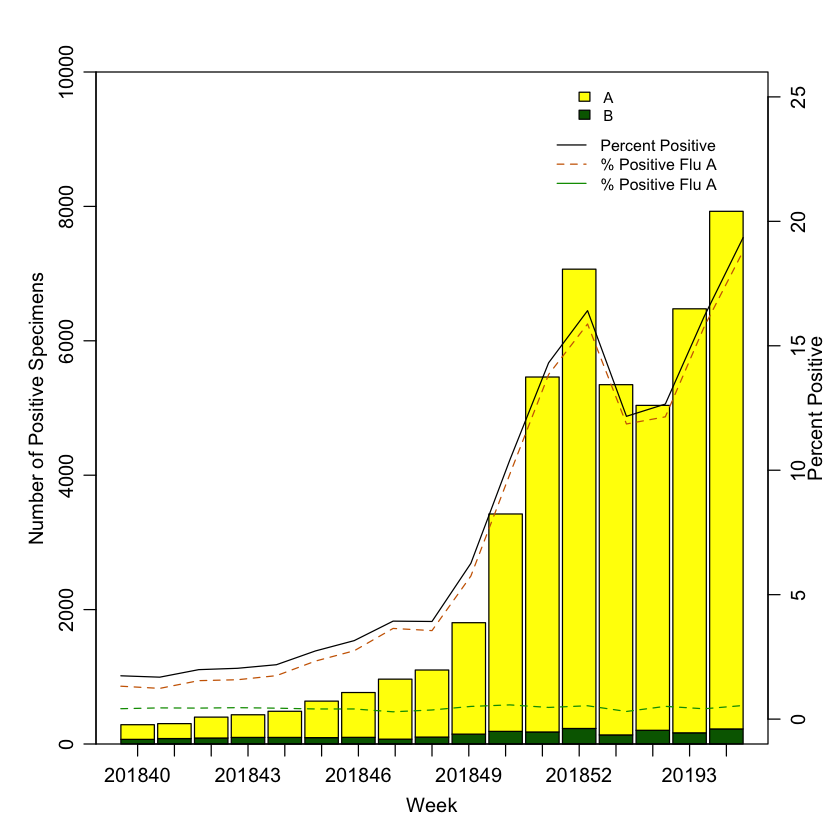

In [244]:

natSumm<-read.csv("WHO_NREVSS_Clinical_Labs.csv", skip = 1)
natSumm <- natSumm[1:17,]
colors <- c("darkgreen", "yellow")
year <- natSumm[,3]
weeks <- natSumm[,4]
weekLabel <- paste0(year, weeks)
posPerc <- natSumm[,8]
posAPerc <- natSumm[,9]
posBPerc <- natSumm[,10]
lineLegend <- c("Percent Positive", "% Positive Flu A", "% Positive Flu A")

par(mar=c(4, 4, 3, 3), mgp=c(2, 0.75, 0))
plt <- barplot(as.matrix(as.data.frame(t(natSumm[,7:6]))), beside=F, xlab="Week", ylab="Number of Positive Specimens", ylim=c(0,10000), names.arg=weekLabel, col=colors,axis.lty="solid", space=0.1)
par(new=TRUE)
plot(plt, posPerc, type="l", col="black", ylim=c(0,25), lwd=1, xlab="", ylab="", xaxt = "n", yaxt = "n")
lines(plt, posAPerc, type = "l", col = "#CC6600", lty=2)
lines(plt, posBPerc, type = "l", col = "#009900", lty=2)
axis(4)
mtext("Percent Positive", side = 4, line = 1.45)
legend("topright",inset=c(0.22,0.01) ,legend=c("A","B"),fill=rev(colors), cex = 0.75, box.lty=0, pt.cex = 0.5)
legend("topright",inset=c(0.06,0.08),legend=lineLegend, col=c("black", "#CC6600", "#009900"), lty=1:2, cex=0.8, box.lty=0)



[1] 2015-40 2015-46 2015-52 2016-06 2016-12 2016-18 2016-24 2016-30 2016-36
[10] 2016-42 2016-48 2017-02 2017-08 2017-14 2017-20 2017-26 2017-32 2017-38
[19] 2017-44 2017-50 2018-04 2018-10 2018-16 2018-22 2018-28 2018-34 2018-40
[28] 2018-46 2018-52 2019-06 2019-12 2019-18 2019-24 2019-30 2019-36 2015-42
[37] 2015-48 2016-02 2016-08 2016-14 2016-20 2016-26 2016-32 2016-38 2016-44
[46] 2016-50 2017-04 2017-10 2017-16 2017-22 2017-28 2017-34 2017-40 2017-46
[55] 2017-52 2018-06 2018-12 2018-18 2018-24 2018-30 2018-36 2018-42 2018-48
[64] 2019-02 2019-08 2019-14 2019-20 2019-26 2019-32 2019-38
208 Levels: 2015-40 2015-41 2015-42 2015-43 2015-44 2015-45 2015-46 ... 2019-39

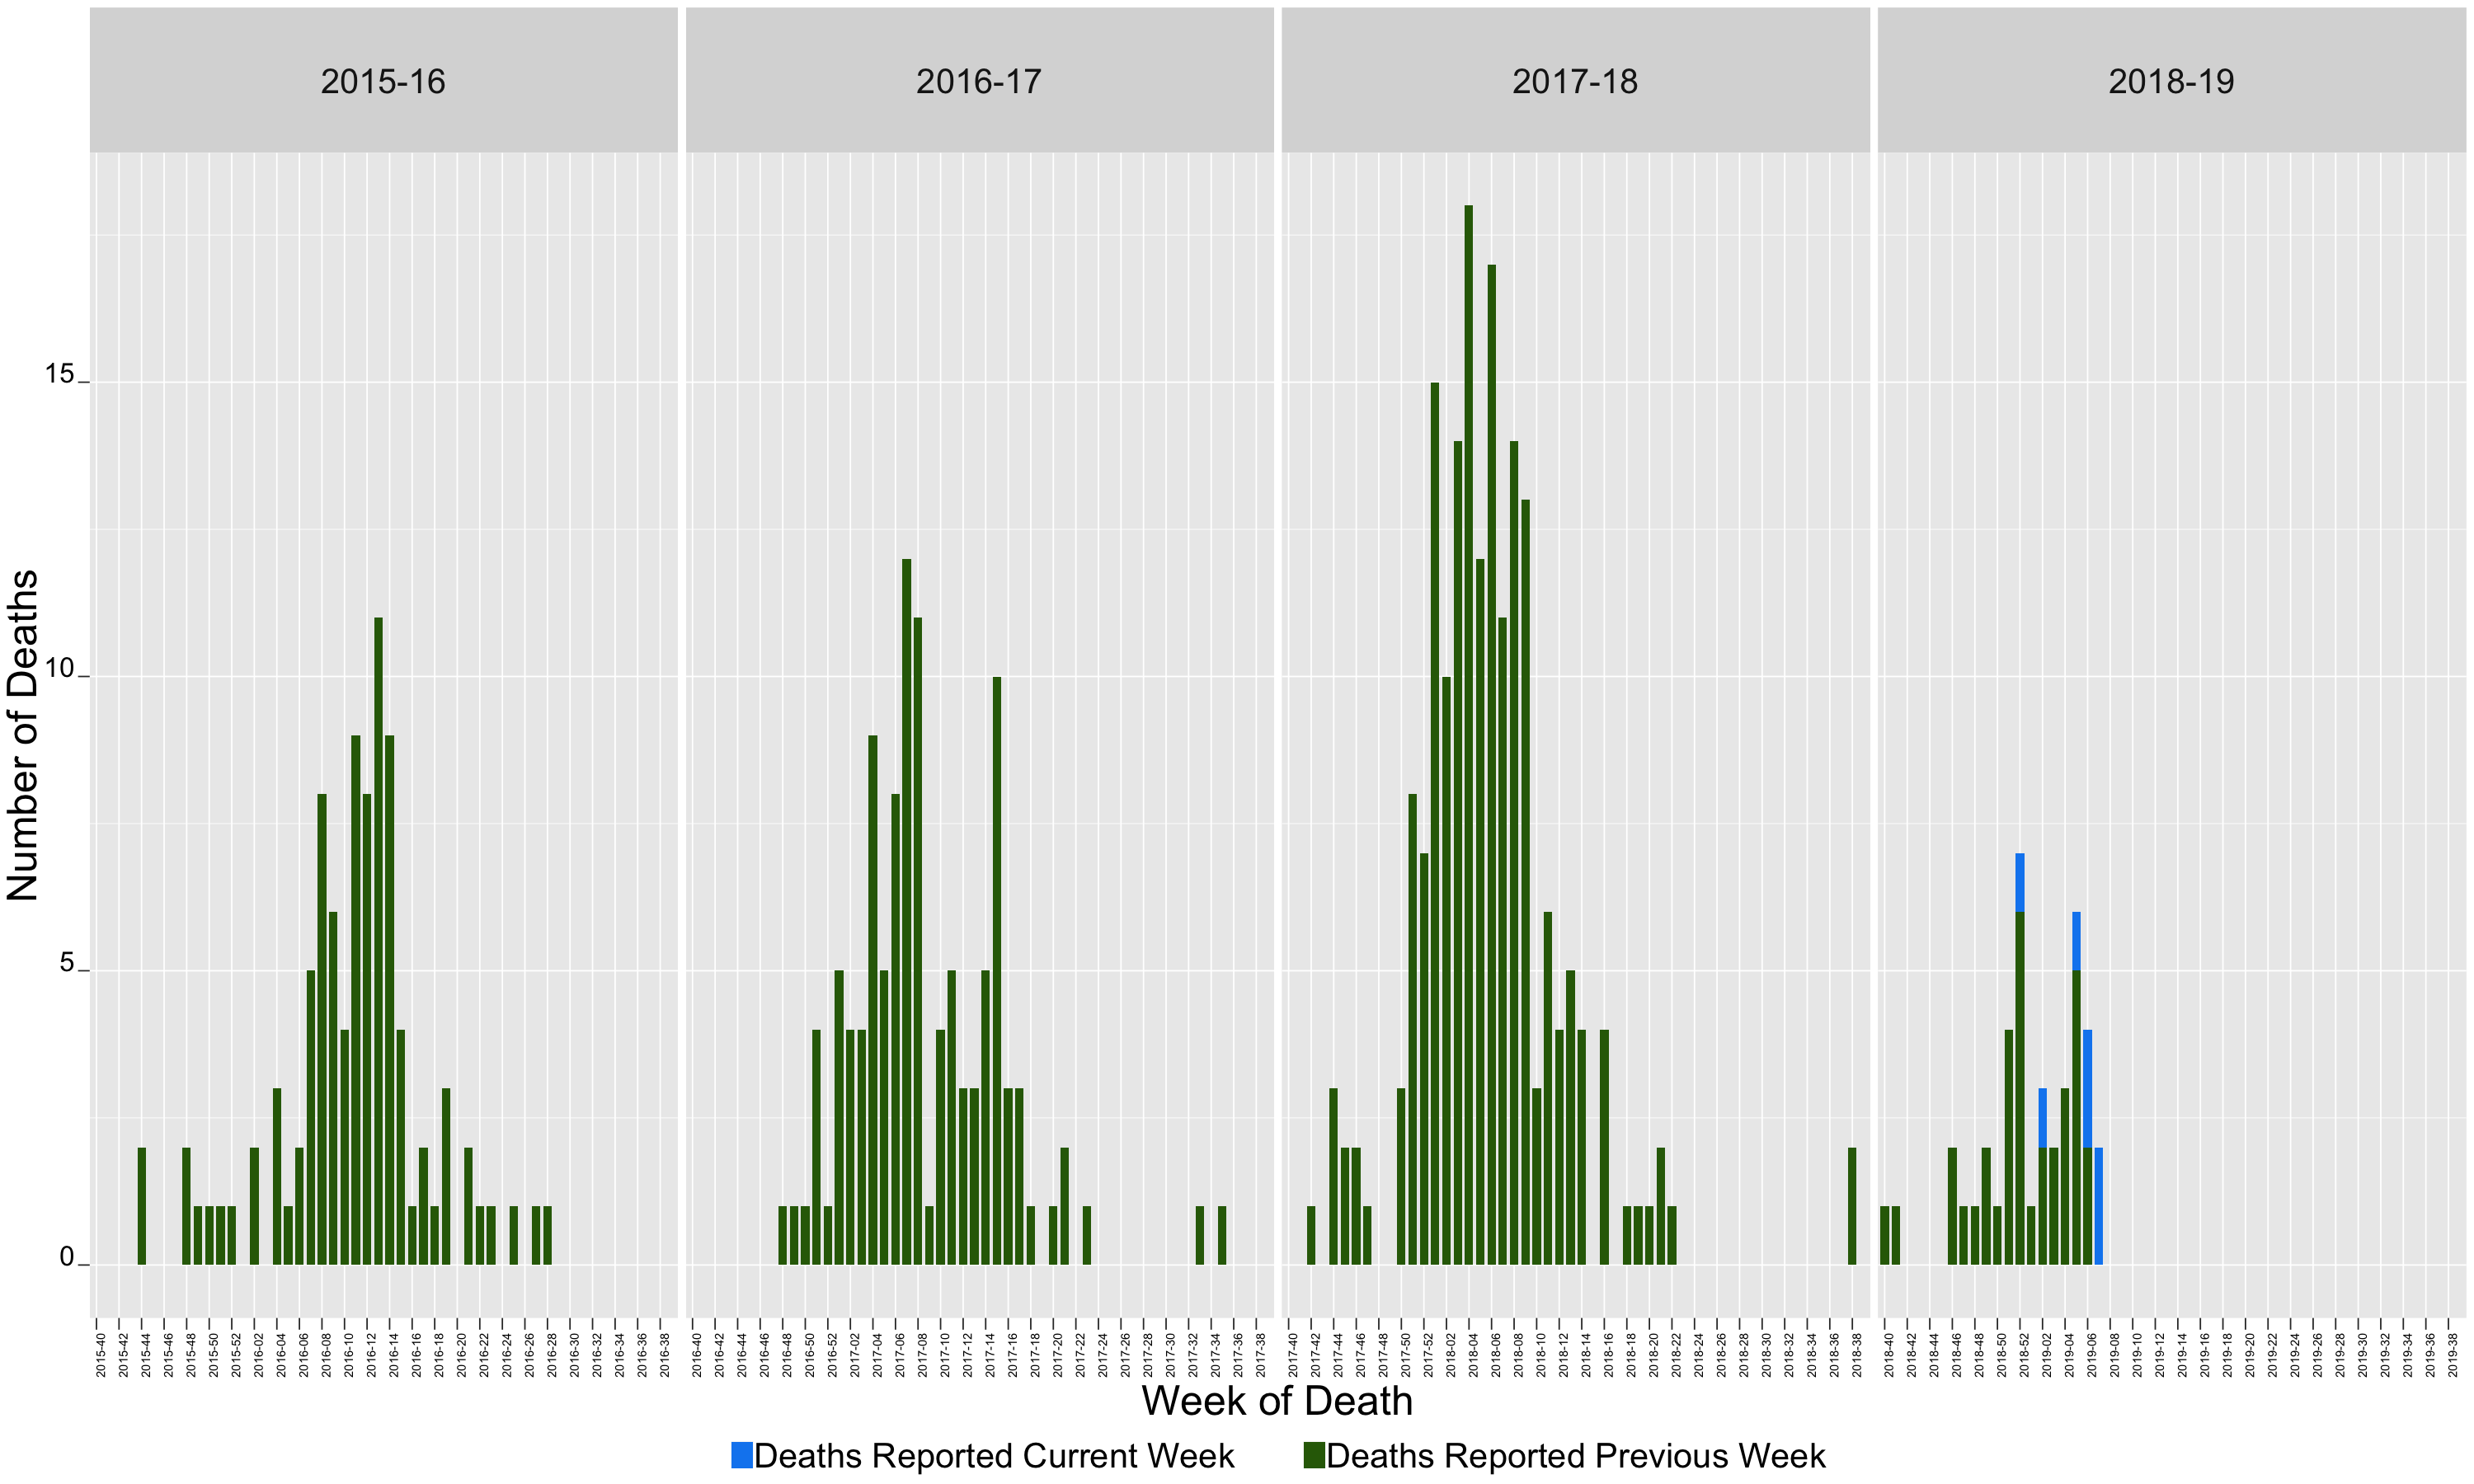

In [107]:

library(ggplot2)
library(plyr)
library(stringr)
library(repr)
library(dplyr)
options(repr.plot.width=25, repr.plot.height=15)
par(mar=c(4, 4, 3, 3), mgp=c(2, 0.75, 0))
weeklyDat <- read.csv("Weekly.csv", skip = 1)
library(reshape2)
weeklyDat <- melt(weeklyDat, id=c("SEASON","WEEK.NUMBER","NO..OF.DEATHS"))
weeklyDat <- plyr::rename(weeklyDat, c("SEASON"="season", "WEEK.NUMBER"="week", "NO..OF.DEATHS"="death", "variable"="fillDat", "value"="count"))

# weeklyDat$weekNew <- str_split_fixed(as.character(weeklyDat[,2]), "-", 2)[,2]
labWeek <- weeklyDat$week

sDeath <- weeklyDat %>% 
          group_by(season) %>% 
          summarise(sumDeath = sum(death))
deathVec <- sDeath$sumDeath
deathVectText <- paste("Number of deaths reported = ",deathVec, sep="")

# weeklyDat <- with(weeklyDat, weeklyDat[order(season, fillDat, week),])
p <- ggplot(data=weeklyDat, aes(x=labWeek, y=count, fill=rev(fillDat), width=.75)) + 
  geom_bar(stat="identity") + 
  labs(x="Week of Death",y="Number of Deaths")+
  facet_grid(~ season, scales="free_x")+
  scale_fill_manual(values = c("#0e88f0", "#2f6806"), labels = c("Deaths Reported Current Week       ", "Deaths Reported Previous Week"))+
  scale_x_discrete(breaks = unique(labWeek)[c(TRUE,FALSE)])

p + theme(legend.position="bottom", 
          legend.text=element_text(size=25),
          axis.text.x = element_text(angle = 90, hjust = 1, colour="black"),
          axis.text.y = element_text(size = 20, angle = 0, hjust = 1, vjust = 0, colour="black"),
          strip.text.x = element_text(size = 25,margin = margin(1.5,0,1.5,0, "cm")),
          axis.title=element_text(size=30,face="plain"),
          axis.ticks.length=unit(.30, "cm"),
          legend.title = element_blank()
         )



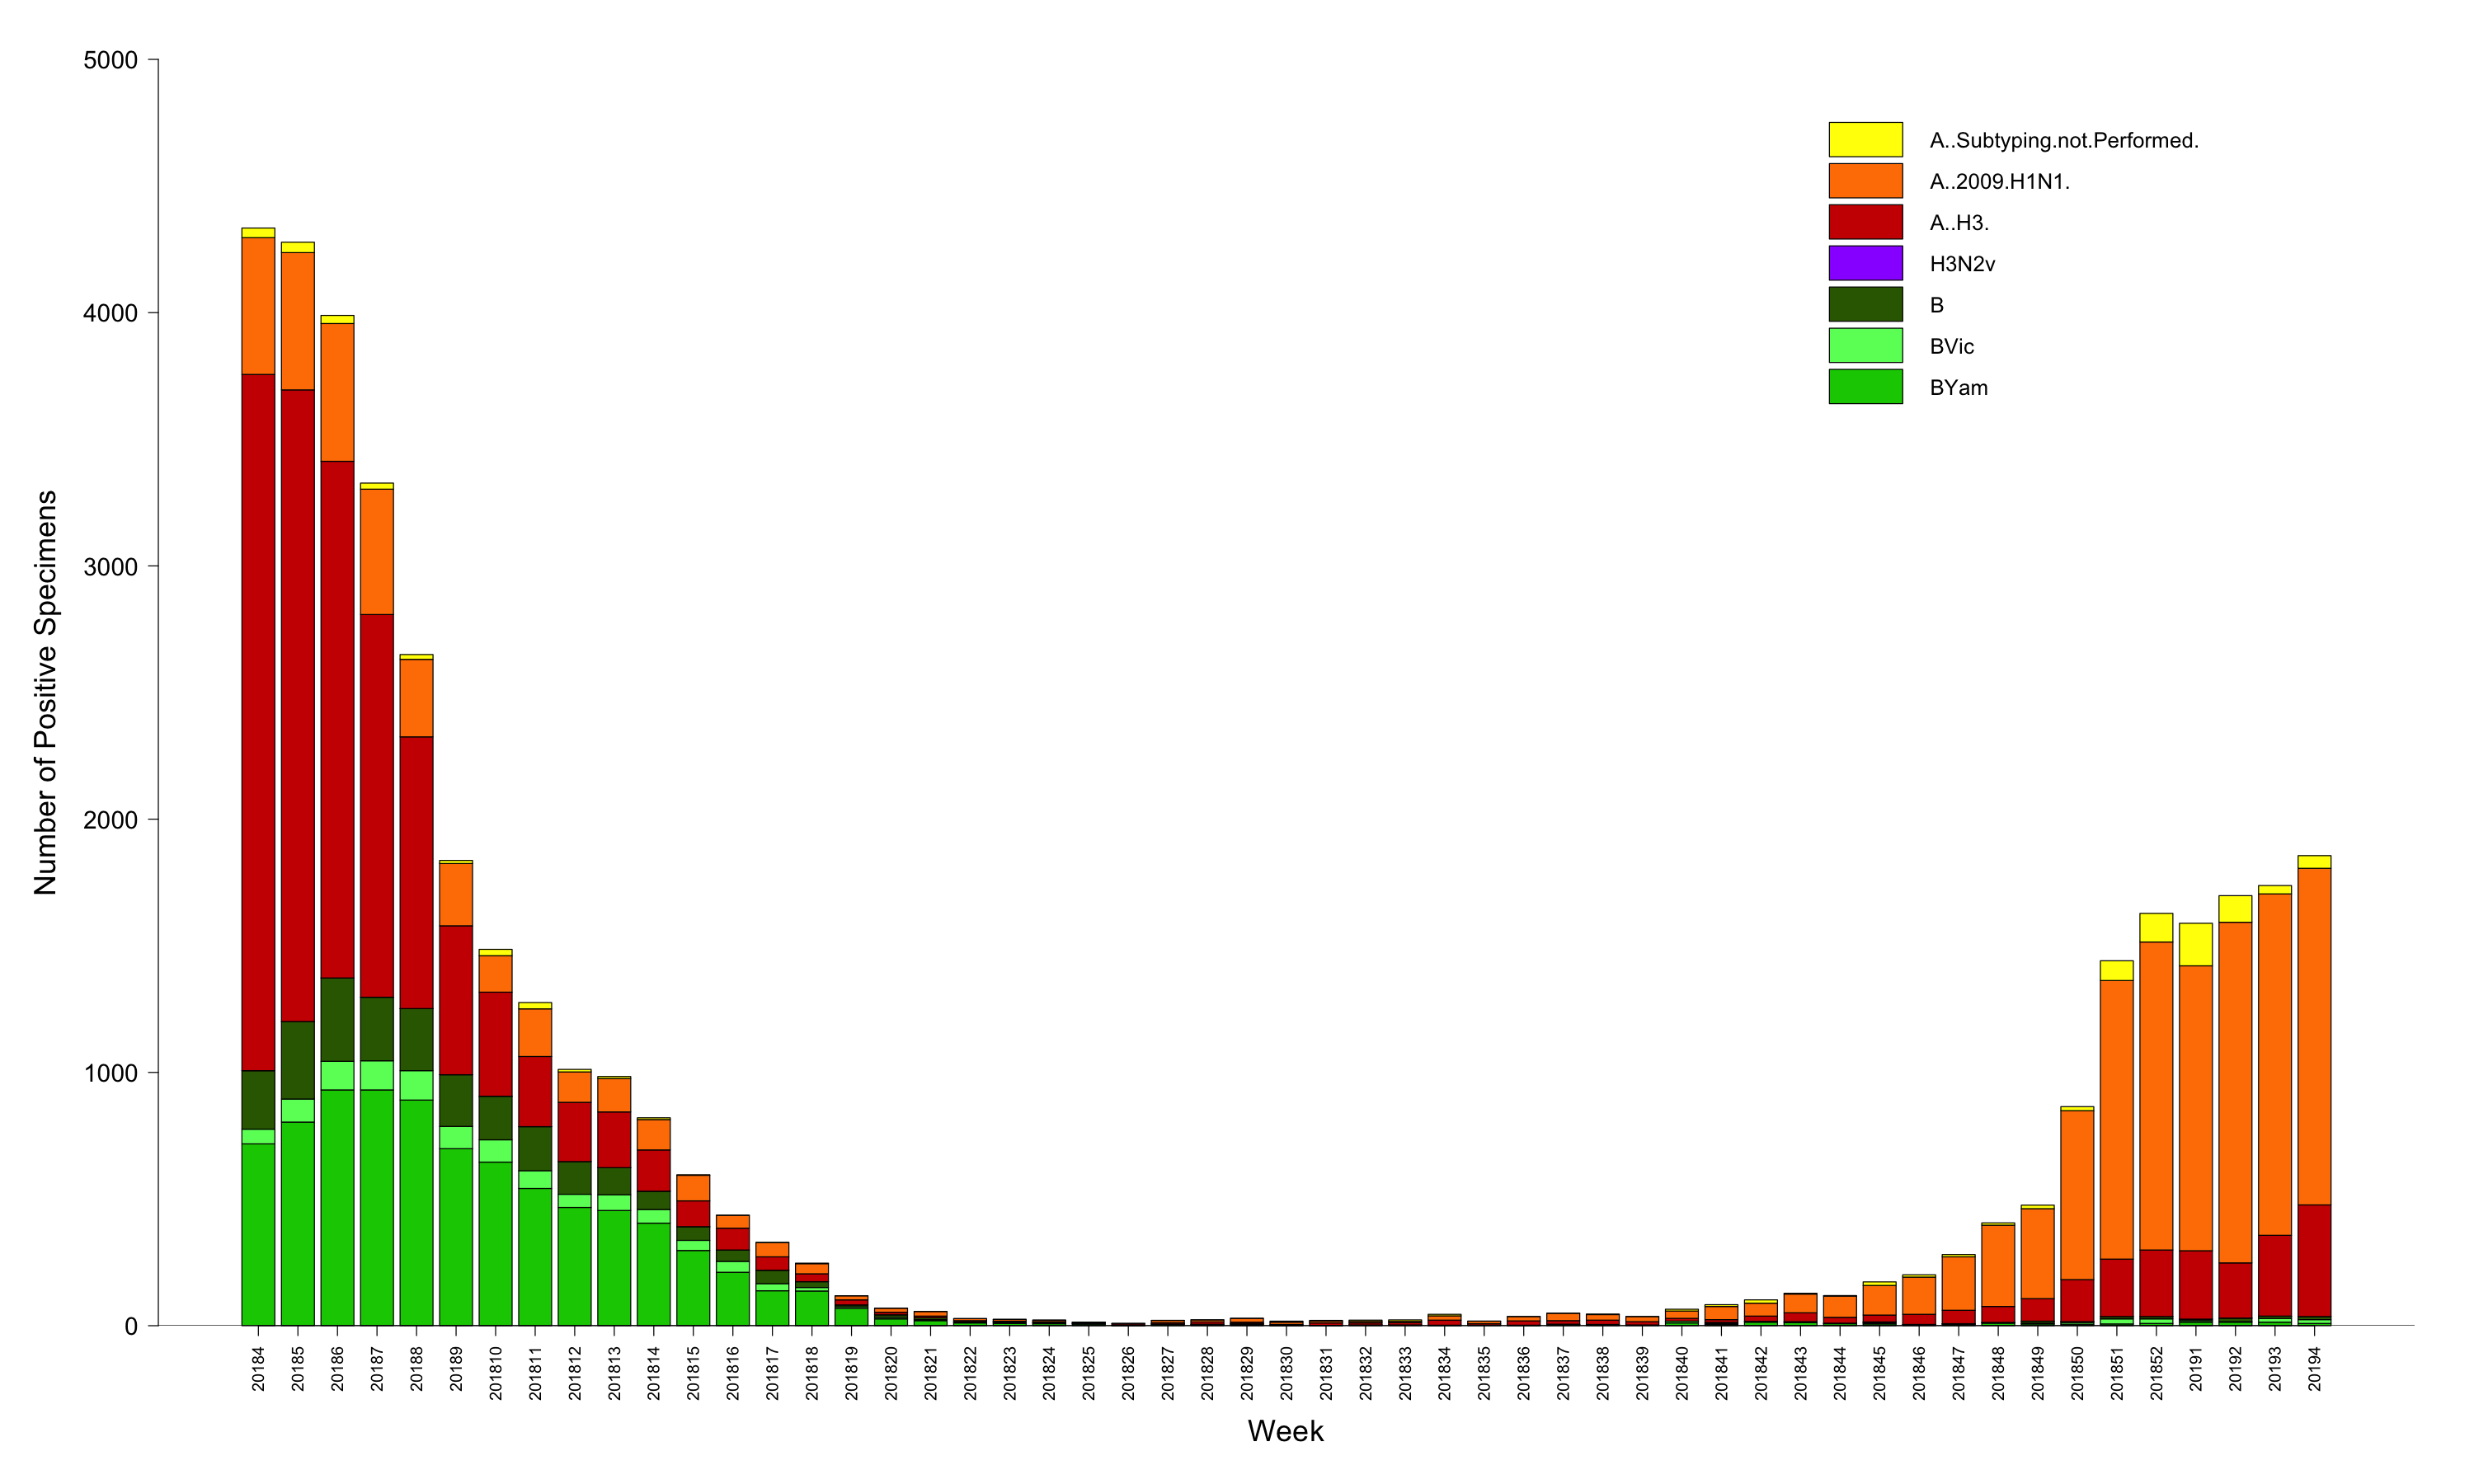

In [195]:
par(mar=c(8, 8, 3, 3))
ptests<-read.csv("WHO_NREVSS_Public_Health_Labs_52.csv", skip = 1)
ptestsR <- ptests[17:69, c(1,2,3,4,5,11,10,9,12,7,6,8)]
year <- ptestsR[,3]
weeks <- ptestsR[,4]
weekLabel <- paste0(year, weeks)
colors <- c("#00CC00", "#66FF66", "#336600", "#9933FF", "#CC0000", "#FF8000", "#FFFF00")

plt <- barplot(as.matrix(as.data.frame(t(ptestsR[,6:12]))),beside=F, names.arg=weekLabel, las=2,ylim=c(0,5000),col=colors,axis.lty="solid", cex.lab=2, cex.axis=1.5)
legend("topleft",inset=c(0.7,0.02),rownames(t(ptestsR[12:6])),fill=rev(colors), cex = 1.3, box.lty=0,x.intersp=0.3, y.intersp=0.6)
mtext("Week", side = 1, line = 5, cex = 1.8)
mtext("Number of Positive Specimens", side = 2, line = 5, cex = 1.8)
abline(h=0)